bigquery query

SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_015_rmt.heart-failure`;

Dataset : Heart Failure

Objective : Create a Classification model using Random Forest and Gradient boosting classifier to predict whether a patient will die or not.

# II. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE 


import joblib
import json
import warnings
warnings.simplefilter("ignore")

# III. Data Loading

In [2]:
# load data
raw_data = pd.read_csv('h8dsft_P1G3_Samuel_Naiborhu.csv')
pd.set_option('display.max_columns', None)

# show dataframe head
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


In [3]:
# show dataframe tail
raw_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


# IV. Exploratory Data Analysis (EDA)

In [4]:
raw_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The maximum age of the dataset is 95 years, the minimum age of the dataset is 40 years. 

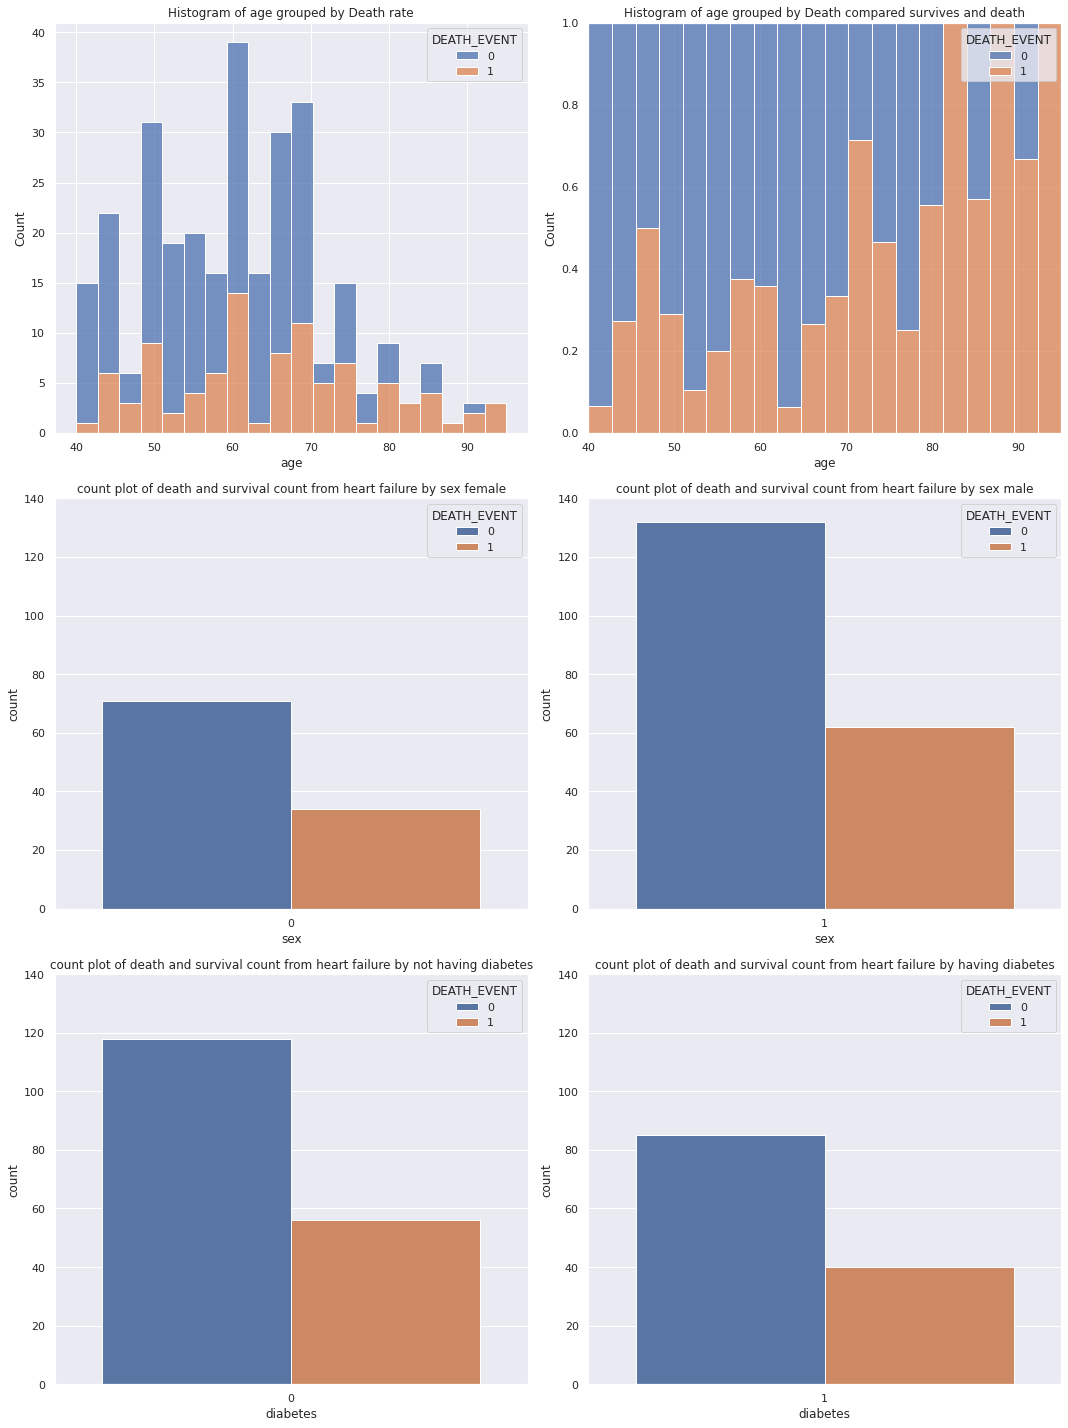

In [5]:
# Create Plot

plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.histplot(x=raw_data['age'], bins=20, hue=raw_data['DEATH_EVENT'], multiple='stack')
plt.title('Histogram of age grouped by Death rate')

plt.subplot(3,2,2)
sns.histplot(x=raw_data['age'], bins=20, hue=raw_data['DEATH_EVENT'], multiple='fill')
plt.title('Histogram of age grouped by Death compared survives and death')

plt.subplot(3,2,3)
sns.countplot(x=raw_data[raw_data['sex'] == 0]['sex'],hue=raw_data['DEATH_EVENT'])
plt.ylim(top=140)
plt.title('count plot of death and survival count from heart failure by sex female')

plt.subplot(3,2,4)
sns.countplot(x=raw_data[raw_data['sex'] == 1]['sex'],hue=raw_data['DEATH_EVENT'])
plt.ylim(top=140)
plt.title('count plot of death and survival count from heart failure by sex male')

plt.subplot(3,2,5)
sns.countplot(x=raw_data[raw_data['diabetes'] == 0]['diabetes'],hue=raw_data['DEATH_EVENT'])
plt.ylim(top=140)
plt.title('count plot of death and survival count from heart failure by not having diabetes')

plt.subplot(3,2,6)
sns.countplot(x=raw_data[raw_data['diabetes'] == 1]['diabetes'],hue=raw_data['DEATH_EVENT'])
plt.ylim(top=140)
plt.title('count plot of death and survival count from heart failure by having diabetes')


plt.tight_layout()
plt.show()

on the first row of the chart above, we can see that (blue = survives, orange = deaths) the older people get heart failure, the higher the risks of death.

In [6]:
# checking male death rate from heart failure
raw_data[(raw_data['sex'] == 1)&(raw_data['DEATH_EVENT'] == 1)]['sex'].count() / raw_data[(raw_data['sex'] == 1)]['DEATH_EVENT'].count() * 100

31.958762886597935

In [7]:
# checking female death rate from heart failure
raw_data[(raw_data['sex'] == 0)&(raw_data['DEATH_EVENT'] == 1)]['sex'].count() / raw_data[(raw_data['sex'] == 0)]['DEATH_EVENT'].count() * 100

32.38095238095238

on the second row of the chart above, and calculations above, we can see (blue = survives, orange = deaths) heart failure, and deaths caused by it happens more in men. although the the death rate from heart failure is slightly higher in women than men.

In [8]:
# checking people without diabtes death rate from heart failure
raw_data[(raw_data['diabetes'] == 0)&(raw_data['DEATH_EVENT'] == 1)]['diabetes'].count() / raw_data[(raw_data['diabetes'] == 0)]['DEATH_EVENT'].count() * 100

32.18390804597701

In [9]:
# checking people with diabtes death rate from heart failure
raw_data[(raw_data['diabetes'] == 1)&(raw_data['DEATH_EVENT'] == 1)]['diabetes'].count() / raw_data[(raw_data['diabetes'] == 1)]['DEATH_EVENT'].count() * 100

32.0

In [10]:
# comparing percentage of people with diabetes had a heart failure
raw_data[(raw_data['diabetes'] == 1)]['diabetes'].count() / raw_data['diabetes'].count() * 100

41.80602006688963

on the third row of the chart above, and calculations above, we can see (blue = survives, orange = deaths) having diebetes lower the risks of having heart failure.

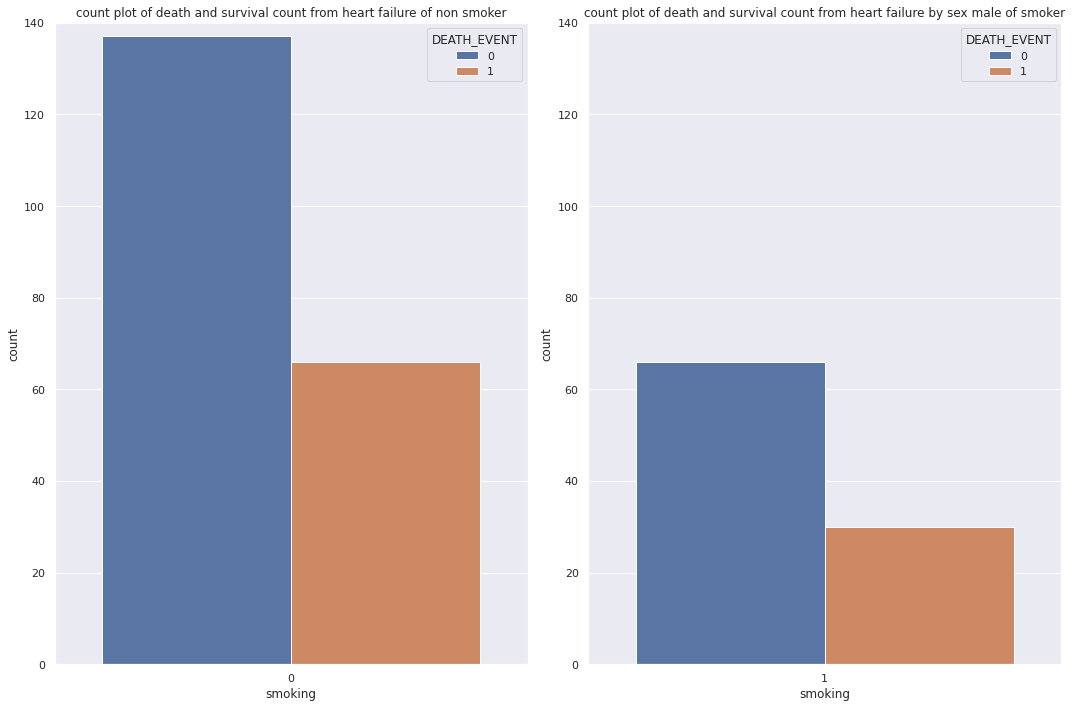

In [11]:
# Create Plot

plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.countplot(x=raw_data[raw_data['smoking'] == 0]['smoking'],hue=raw_data['DEATH_EVENT'])
plt.ylim(top=140)
plt.title('count plot of death and survival count from heart failure of non smoker')

plt.subplot(1,2,2)
sns.countplot(x=raw_data[raw_data['smoking'] == 1]['smoking'],hue=raw_data['DEATH_EVENT'])
plt.ylim(top=140)
plt.title('count plot of death and survival count from heart failure by sex male of smoker')


plt.tight_layout()
plt.show()

In [12]:
# checking smoker death rate from heart failure
raw_data[(raw_data['smoking'] == 1)&(raw_data['DEATH_EVENT'] == 1)]['smoking'].count() / raw_data[(raw_data['smoking'] == 1)]['DEATH_EVENT'].count() * 100

31.25

In [13]:
# checking non smoker death rate from heart failure
raw_data[(raw_data['smoking'] == 0)&(raw_data['DEATH_EVENT'] == 1)]['smoking'].count() / raw_data[(raw_data['smoking'] == 0)]['DEATH_EVENT'].count() * 100

32.51231527093596

Heart failures are far often encountered by people who smoke, smoking probably one of the biggest cause of heart failure. That said the rate of survival of people who smoke is more or less the same with non smoker, perhaps there are other factors that affect the rates of survival.

# V. Data preprocessing

## V.I. define dataframe for inferencing

In [14]:
inf_count =  round(raw_data.shape[0]*0.05)
inf_count

15

In [15]:
# Get Data for model inference
data_inf = raw_data.sample(inf_count, random_state=33)
data_inf.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
205,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
69,73.0,1,1185,0,40,1,220000.00,0.9,141,0,0,213,0
198,40.0,0,90,0,35,0,255000.00,1.1,136,1,1,212,0
56,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
11,60.0,0,1896,1,25,0,365000.00,2.1,144,0,0,172,1


In [16]:
# drop data_inf from main dataframe
raw_data_1 = raw_data.drop(data_inf.index)
print(f'old data size: {raw_data.shape[0]}')
print(f'new data size: {raw_data_1.shape[0]}')

old data size: 299
new data size: 284


## V.II. Split train test dataset

In [17]:
# see whether data imbalance or not
raw_data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [18]:
# define features variable as X
X = raw_data_1.drop('DEATH_EVENT', axis=1)

In [19]:
# define target variable as y
y = raw_data_1['DEATH_EVENT']
y.sample(5)

29     0
204    0
99     0
192    0
23     0
Name: DEATH_EVENT, dtype: int64

In [20]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=33)

print(f'Train size: {X_train.shape[0]}')
print(f'Test size: {X_test.shape[0]}')

Train size: 227
Test size: 57


## V.III. Handling empty values

In [21]:
# sum null value
X_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

After checking the dataset, there is no empty value found.

## V.IV. Handling Outlier

In [22]:
# sumarize current dataset
X_train.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
187,51.0,1,582,1,35,0,263358.03,1.50,136,1,1,145
165,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212
135,68.0,1,646,0,25,0,305000.00,2.10,130,1,0,108
38,55.0,0,572,1,35,0,231000.00,0.80,143,0,0,215
182,53.0,1,270,1,35,0,227000.00,3.40,145,1,0,105
163,73.0,1,231,1,30,0,160000.00,1.18,142,1,1,180
217,75.0,0,99,0,38,1,224000.00,2.50,134,1,0,162
280,53.0,0,56,0,50,0,308000.00,0.70,135,1,1,231
67,60.0,1,2281,1,40,0,283000.00,1.00,141,0,0,187
152,60.0,0,2656,1,30,0,305000.00,2.30,137,1,0,30


In [23]:
# Plot outlier for target

def outlier_plot(features):
    # Define figure size
    plt.figure(figsize=(16, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(features, bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=features)
    plt.title('Boxplot')

    plt.show()

In [24]:
# make boundary function
def iqr_calc(feature):
    skew_value = feature.skew()
    
    if -0.5 > skew_value < 0.5: # Normally distributed boundary
        upper_boundary = feature.mean() + 3 * feature.std()
        lower_boundary = feature.mean() - 3 * feature.std()
    else: # skewed boundary
        IQR= feature.quantile(0.75) - feature.quantile(0.25)
        lower_boundary= feature.quantile(0.25)-(IQR*1.5)
        upper_boundary= feature.quantile(0.75)+(IQR*1.5)
    return lower_boundary, upper_boundary

In [25]:
# make capping function
def capping_data(dataset, column):
  lower_bound, upper_bound = iqr_calc(dataset[column])
  dataset.loc[dataset[column] > upper_bound, column] = upper_bound
  dataset.loc[dataset[column] < lower_bound, column] = lower_bound
  return dataset

In [26]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Categorical Columns :  []


From the list above, we can see that there is no categorical feature. actually,
some of the features were actually categorical but has been encoded(eg: anemia, sex, etc), we're going to move them to the categorical columns

In [27]:
# Add actual categorical features to cat_columns list
cat_columns.extend(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'])

In [28]:
# summarize new cat_columns
cat_columns

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [29]:
# dropping categorical features from numerical features
num_columns = [i for i in num_columns if i not in cat_columns]
num_columns


['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

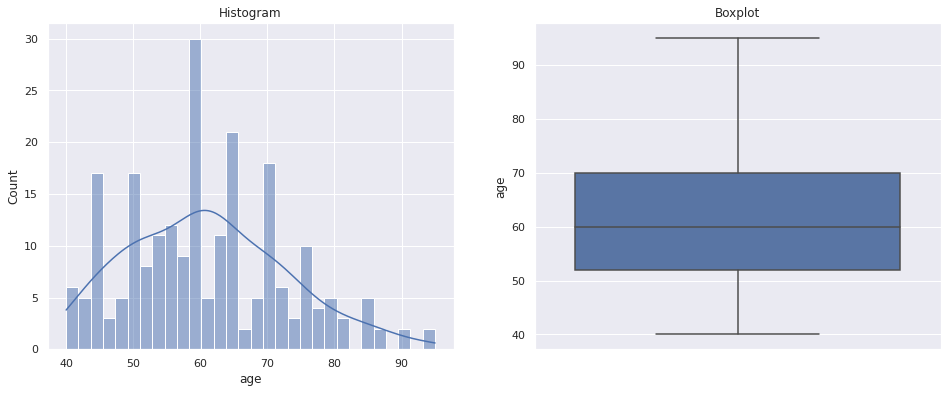

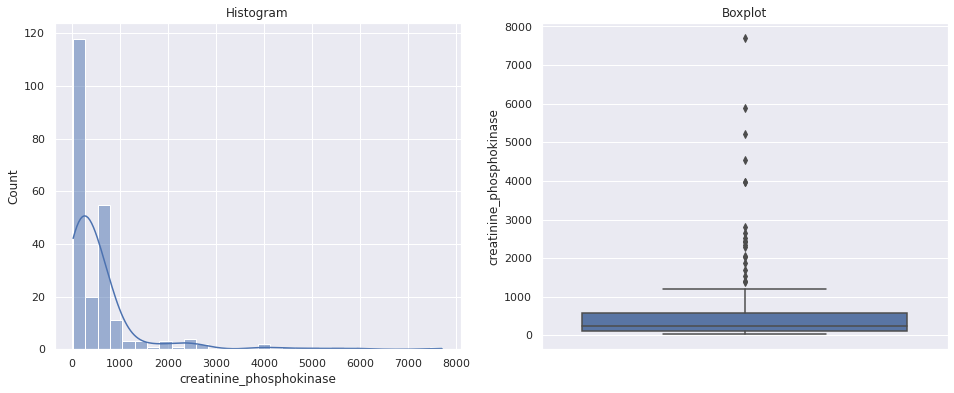

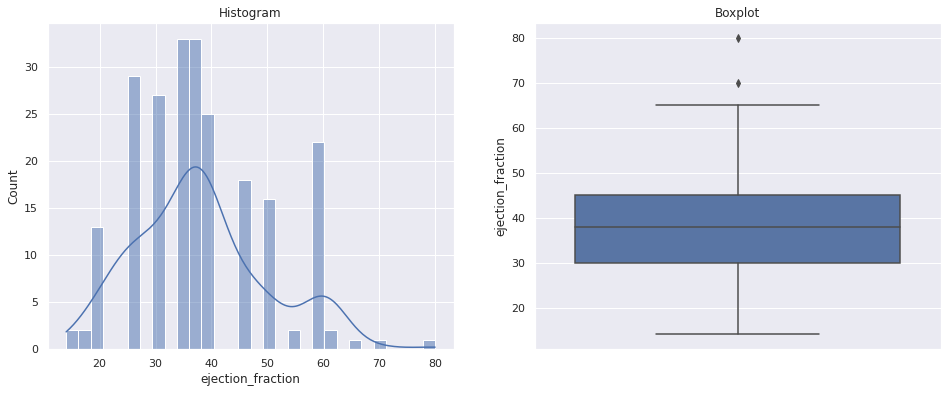

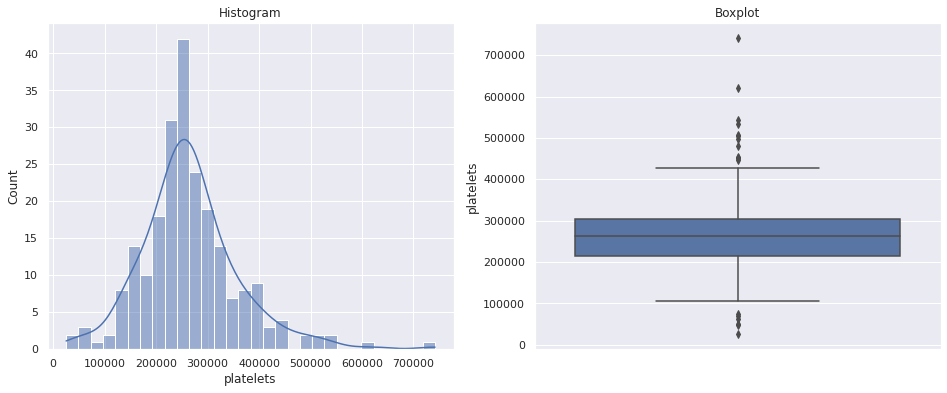

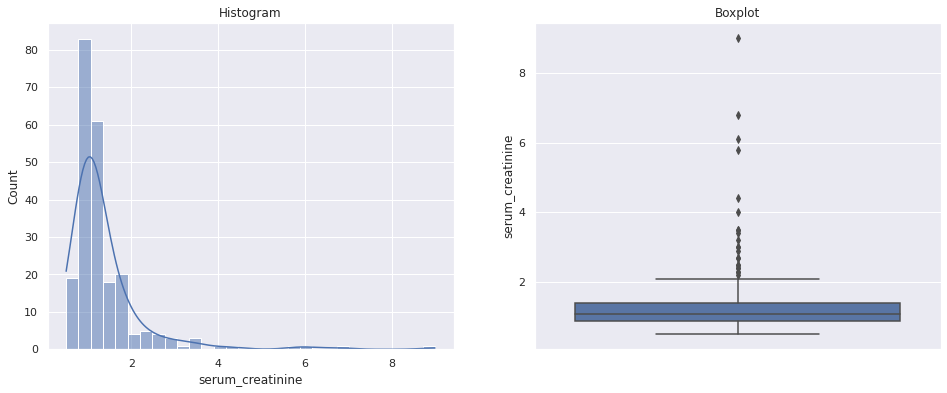

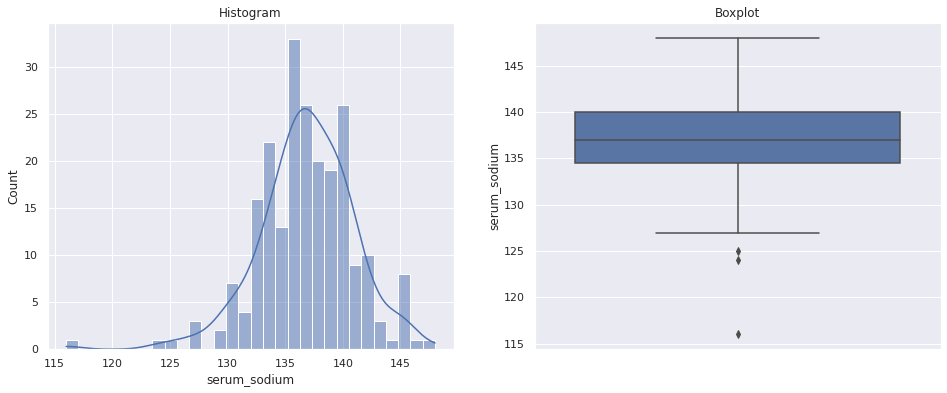

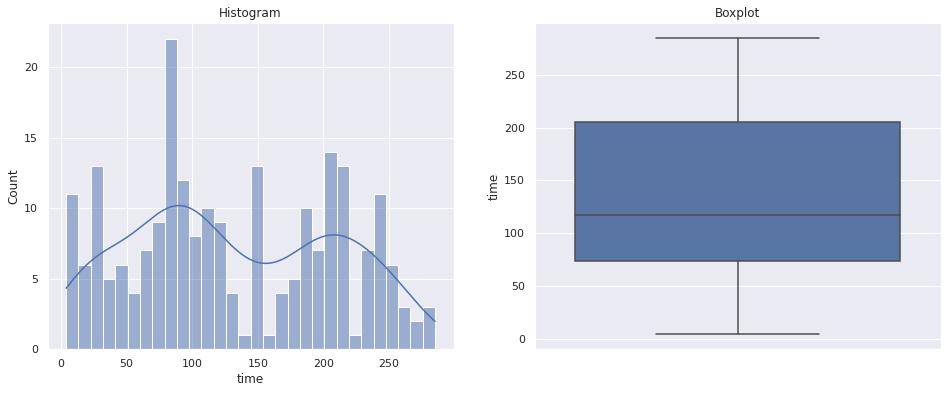

In [30]:
# plotting for numerical columns looking for outlier
for i in num_columns:
  outlier_plot(X_train[i])

there are several features with outlier like creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium.
this outlier would make our model less accurate and bias.

In [31]:
# Capping numerical columns
X_train_2 = X_train.copy()
for i in num_columns:
    capping_data(X_train_2, i)

In [32]:
# # recheck for outlier_list
# for i in num_columns:
#   outlier_plot(X_train_2[i])

## V.V Feature Selection

In [33]:
# find corelation between features
X_train_cor = X_train_2.corr() 

In [34]:
# summarize correlation between features
X_train_cor

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
age,1.000000,0.098416,-0.102041,-0.124297,0.055810,0.093418,-0.065962,0.310904,-0.088210,0.072223,0.012831,-0.267518
anaemia,0.098416,1.000000,-0.246179,-0.003026,0.051880,0.044384,-0.029020,0.004078,0.091725,-0.094171,-0.028742,-0.175146
creatinine_phosphokinase,-0.102041,-0.246179,1.000000,0.020730,-0.057648,-0.085531,-0.009342,-0.083664,0.045650,0.067905,0.007917,0.093855
diabetes,-0.124297,-0.003026,0.020730,1.000000,-0.033588,-0.047453,0.098812,-0.005887,-0.053955,-0.152188,-0.147242,0.045524
ejection_fraction,0.055810,0.051880,-0.057648,-0.033588,1.000000,-0.019813,0.068361,-0.112588,0.213325,-0.168065,-0.050210,0.081183
high_blood_pressure,0.093418,0.044384,-0.085531,-0.047453,-0.019813,1.000000,0.074440,-0.031950,0.037836,-0.095732,-0.012418,-0.205100
platelets,-0.065962,-0.029020,-0.009342,0.098812,0.068361,0.074440,1.000000,-0.036757,0.033818,-0.131081,0.008817,-0.020359
serum_creatinine,0.310904,0.004078,-0.083664,-0.005887,-0.112588,-0.031950,-0.036757,1.000000,-0.287952,0.047299,-0.080401,-0.184214
serum_sodium,-0.088210,0.091725,0.045650,-0.053955,0.213325,0.037836,0.033818,-0.287952,1.000000,-0.066821,-0.000678,0.108335
sex,0.072223,-0.094171,0.067905,-0.152188,-0.168065,-0.095732,-0.131081,0.047299,-0.066821,1.000000,0.466813,0.022930


There are no features that are correlated with each other. Therefore no feature removal needed.

## V.VI. Feature Scaling

In [35]:
# get numerical columns from training set and test set
X_train_num = X_train_2[num_columns]
X_test_num = X_test[num_columns]

In [36]:
# Define scaler
scaler = MinMaxScaler()

scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

In [37]:
# Summarize scaled data
X_train_scaled

array([[0.54545455, 0.44836575, 0.48598131, ..., 1.        , 0.49049132,
        0.87544484],
       [0.6       , 0.44836575, 0.39252336, ..., 0.48484848, 0.40557321,
        0.6797153 ],
       [0.85454545, 0.10106276, 0.44859813, ..., 0.24242424, 0.66032755,
        0.03558719],
       ...,
       [0.45454545, 0.55905354, 0.48598131, ..., 0.3030303 , 0.49049132,
        0.73309609],
       [0.54545455, 0.44836575, 0.44859813, ..., 0.36363636, 0.66032755,
        0.86120996],
       [0.36363636, 0.44836575, 0.29906542, ..., 0.24242424, 0.87262283,
        0.32384342]])

In [38]:
# Create dataframe for X numeric features
X_train_3 = pd.DataFrame(X_train_scaled, columns=num_columns)
X_test_2 = pd.DataFrame(X_test_scaled, columns=num_columns)

X_train_3.head(5)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,0.545455,0.448366,0.485981,0.000000,1.000000,0.490491,0.875445
1,0.600000,0.448366,0.392523,0.340084,0.484848,0.405573,0.679715
2,0.854545,0.101063,0.448598,0.504888,0.242424,0.660328,0.035587
3,0.272727,0.029677,0.392523,0.409916,0.424242,0.448032,0.306050
4,0.418182,0.136355,0.859813,0.597067,0.484848,0.872623,0.366548


In [39]:
# resetting index on categorical features
X_train_cat = X_train_2[cat_columns].reset_index(drop=True)
X_test_cat = X_test[cat_columns].reset_index(drop=True)


X_train_cat

,anaemia,diabetes,high_blood_pressure,sex,smoking
0,0,0,0,1,1
1,0,0,1,1,0
2,1,0,0,1,0
3,0,0,0,1,1
4,0,0,1,1,1
...,...,...,...,...,...
222,1,0,0,1,0
223,0,1,0,1,0
224,1,1,0,0,0
225,0,1,0,1,0


In [40]:
# Join categorical and numerical features together
X_train_cleaned = X_train_3.join(X_train_cat)
X_test_cleaned = X_test_2.join(X_test_cat)

# VI. Modelling

## VI.I Modelling for Gradient Boost

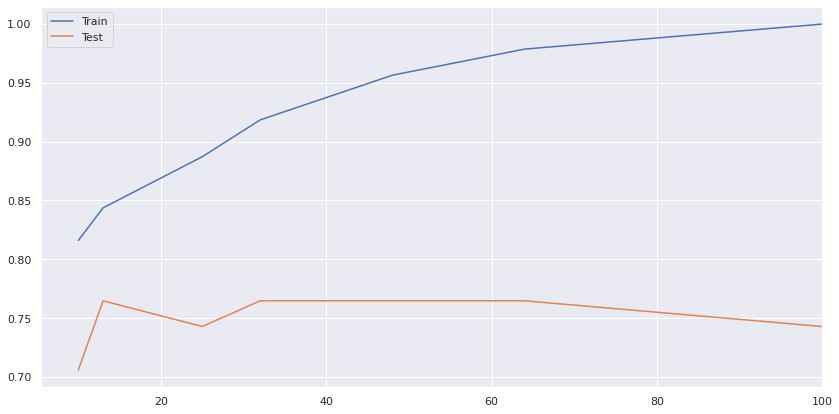

In [41]:
n_estimat = [10, 13, 25, 32, 48, 64, 100]
f1_train,f1_test=[],[]
for i in n_estimat :
  tree = GradientBoostingClassifier(n_estimators=i)

  tree.fit(X_train_cleaned,y_train)
  y_train_pred = tree.predict(X_train_cleaned)
  y_test_pred = tree.predict(X_test_cleaned)

  f1_train.append(f1_score(y_train,y_train_pred))
  f1_test.append(f1_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train,x=n_estimat, label='Train')
sns.lineplot(y=f1_test,x=n_estimat, label='Test')
#plt.xticks(ticks=np.arrange(0.00,0.25,0.01))
plt.xlim(right=100)
#plt.xlim(left=1)
plt.show()

We're looking for the point where both line are close to each other and have a highest f1 score, n estimators = 10.

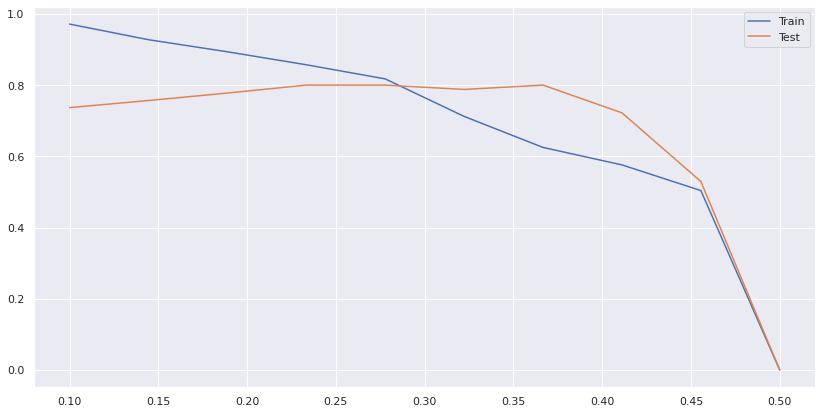

In [42]:
min_samples_leav = np.linspace(0.1, 0.5, 10, endpoint=True)
f1_train,f1_test=[],[]
for i in min_samples_leav :
  tree = GradientBoostingClassifier(min_samples_leaf=i)

  tree.fit(X_train_cleaned,y_train)
  y_train_pred = tree.predict(X_train_cleaned)
  y_test_pred = tree.predict(X_test_cleaned)

  f1_train.append(f1_score(y_train,y_train_pred))
  f1_test.append(f1_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train,x=min_samples_leav, label='Train')
sns.lineplot(y=f1_test,x=min_samples_leav, label='Test')
#plt.xticks(ticks=np.arrange(0.00,0.25,0.01))
# plt.xlim(right=32)
#plt.xlim(left=1)
plt.show()

We're looking for the point where both line are close to each other and have a highest f1 score, that would be a minimum sample leaf = 0.28.

In [43]:
# Define model
gradient_boost = GradientBoostingClassifier(n_estimators=10, min_samples_leaf=0.28)
# training model
gradient_boost.fit(X_train_cleaned, y_train)
gb_pred = gradient_boost.predict(X_test_cleaned)
gb_pred_train = gradient_boost.predict(X_train_cleaned)

In [44]:
print(classification_report(y_train,gb_pred_train))
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       155
           1       0.75      0.67      0.71        72

    accuracy                           0.82       227
   macro avg       0.80      0.78      0.79       227
weighted avg       0.82      0.82      0.82       227

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        39
           1       0.62      0.72      0.67        18

    accuracy                           0.77        57
   macro avg       0.74      0.76      0.75        57
weighted avg       0.78      0.77      0.78        57



## VI.II Modelling for random forest

In [45]:
rand_forest_model = RandomForestClassifier()

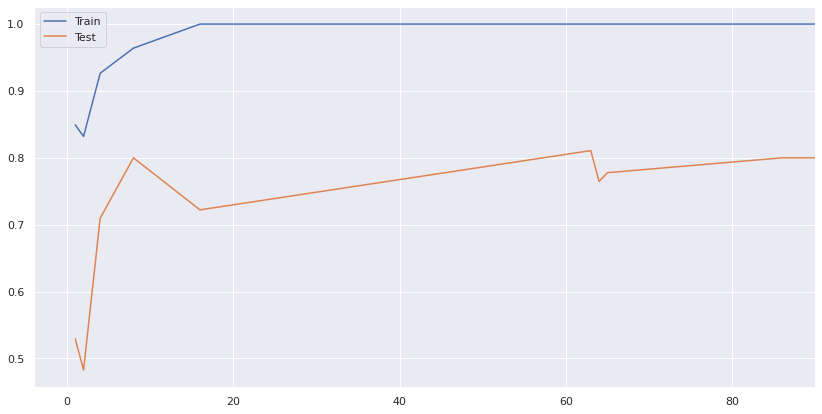

In [46]:
n_estimat = [1, 2, 4, 8, 16, 63, 64, 65, 86, 100]
f1_train,f1_test=[],[]
for i in n_estimat :
  randf = RandomForestClassifier(n_estimators=i)

  randf.fit(X_train_cleaned,y_train)
  y_train_pred = randf.predict(X_train_cleaned)
  y_test_pred = randf.predict(X_test_cleaned)

  f1_train.append(f1_score(y_train,y_train_pred))
  f1_test.append(f1_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train,x=n_estimat, label='Train')
sns.lineplot(y=f1_test,x=n_estimat, label='Test')
#plt.xticks(ticks=np.arrange(0.00,0.25,0.01))
plt.xlim(right=90)
#plt.xlim(left=1)
plt.show()

We're looking for the point where both line are close to each other and have a highest f1 score, n estimators would be on 63.

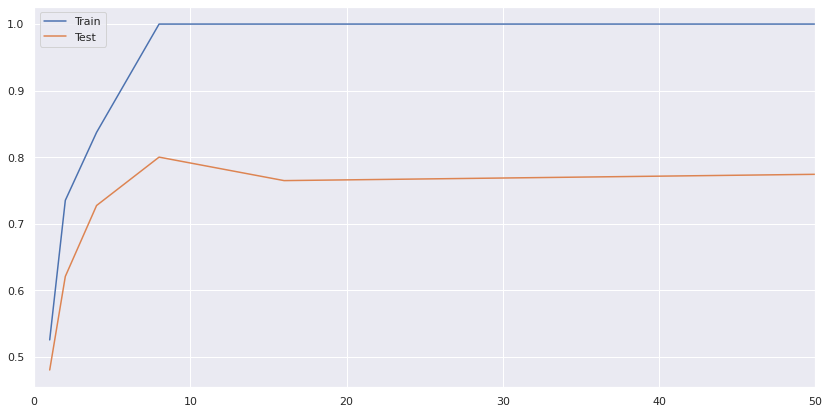

In [47]:
max_depth = [10, 15, 16, 18, 20, 31, 35, 45]
f1_train,f1_test=[],[]
for i in n_estimat :
  randf = RandomForestClassifier(max_depth=i)

  randf.fit(X_train_cleaned,y_train)
  y_train_pred = randf.predict(X_train_cleaned)
  y_test_pred = randf.predict(X_test_cleaned)

  f1_train.append(f1_score(y_train,y_train_pred))
  f1_test.append(f1_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=f1_train,x=n_estimat, label='Train')
sns.lineplot(y=f1_test,x=n_estimat, label='Test')
#plt.xticks(ticks=np.arrange(0.00,0.25,0.01))
plt.xlim(left=0, right=50)
#plt.xlim(left=1)
plt.show()

We're looking for the point where both line are close to each other and have a highest f1 score, max_depth would be on 45.

In [48]:
rand_forest_model = RandomForestClassifier(n_estimators=63, max_depth=45)
rand_forest_model.fit(X_train_cleaned,y_train)
y_train_pred = rand_forest_model.predict(X_train_cleaned)
y_test_pred = rand_forest_model.predict(X_test_cleaned)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        72

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        39
           1       0.79      0.83      0.81        18

    accuracy                           0.88        57
   macro avg       0.86      0.87      0.86        57
weighted avg       0.88      0.88      0.88        57



### Analysis

Before we start modelling, we use iteration to see which hyperparameters are best to use. hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training. we're using f1 score to measures how good the prediction. F1 score is a metric to measures accuracies for clasiffications, highest score is 1.

for the gradient boost model the f1 score for training is 0.71 and for the test set is 0.67, there's a slight overfit (means,  statistical model is said to be overfitted when the model does not make accurate predictions on testing data), but thats good enogh. the score itself is 'ok' or acceptable.

for the Random forest model the f1 score for training is 1 and for the test set is 0.81, there's a moderate overfit, but since the score for the test set is good, we can be cautiously accept it.

The random forest model performs better compared to gradient boost. That said, gradient boost modlling on the test set is better fit than random forest.

# VII. Model Saving

In [49]:
# save model
with open('gradient_boost.pkl', 'wb') as file_1:
  joblib.dump(gradient_boost, file_1)

with open('model_scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('rand_forest_model.pkl', 'wb') as file_3:
  joblib.dump(rand_forest_model, file_3)

with open('list_num.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

# VIII. Model Inference

In [50]:
# save model
with open('gradient_boost.pkl', 'rb') as file_1:
  model_gradient_boost = joblib.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = joblib.load(file_2)

with open('rand_forest_model.pkl', 'rb') as file_3:
  model_rand_forest = joblib.load(file_3)

with open('list_num.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

In [51]:
# display inference-set
data_inf.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
287,53.0,1,1808,0,60,1,249000.0,0.7,138,1,1,106,0
296,70.0,0,97,0,60,1,220000.0,0.9,138,1,0,186,0
110,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1
268,65.0,0,94,1,50,1,188000.0,1.0,140,1,0,29,1
169,42.0,0,64,0,30,0,215000.0,3.8,128,1,1,250,0


In [52]:
# split between numerical columns and categorical columns
data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]

data_inf_num

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
198,40.0,90,35,255000.00,1.10,136,212
272,67.0,582,50,263358.03,1.18,137,76
268,65.0,94,50,188000.00,1.00,140,29
238,66.0,72,40,242000.00,1.20,134,121
56,55.0,1820,38,270000.00,1.20,139,271
11,60.0,1896,25,365000.00,2.10,144,172
205,55.0,7861,38,263358.03,1.10,136,6
296,70.0,97,60,220000.00,0.90,138,186
287,53.0,1808,60,249000.00,0.70,138,106
69,73.0,1185,40,220000.00,0.90,141,213


In [53]:
# feature sfcaling

data_inf_num_scaled = model_scaler.transform(data_inf_num)

data_inf_num_scaled

array([[ 0.        ,  0.05373972,  0.39252336,  0.4853352 ,  0.36363636,
         0.49049132,  0.74021352],
       [ 0.49090909,  0.44836575,  0.6728972 ,  0.50868165,  0.41212121,
         0.53295038,  0.25622776],
       [ 0.45454545,  0.05694806,  0.6728972 ,  0.29818436,  0.3030303 ,
         0.66032755,  0.08896797],
       [ 0.47272727,  0.03930219,  0.48598131,  0.44902235,  0.42424242,
         0.40557321,  0.41637011],
       [ 0.27272727,  1.4413475 ,  0.44859813,  0.52723464,  0.42424242,
         0.61786849,  0.95017794],
       [ 0.36363636,  1.502306  ,  0.20560748,  0.79259777,  0.96969697,
         0.83016377,  0.59786477],
       [ 0.27272727,  6.28674554,  0.44859813,  0.50868165,  0.36363636,
         0.49049132,  0.00711744],
       [ 0.54545455,  0.05935432,  0.85981308,  0.38756983,  0.24242424,
         0.57540943,  0.64768683],
       [ 0.23636364,  1.43172248,  0.85981308,  0.46857542,  0.12121212,
         0.57540943,  0.36298932],
       [ 0.6       ,  0.9320

In [54]:
# concate numerical columns and categorical columns

data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat], axis=1)
data_inf_final

array([[ 0.        ,  0.05373972,  0.39252336,  0.4853352 ,  0.36363636,
         0.49049132,  0.74021352,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ],
       [ 0.49090909,  0.44836575,  0.6728972 ,  0.50868165,  0.41212121,
         0.53295038,  0.25622776,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ],
       [ 0.45454545,  0.05694806,  0.6728972 ,  0.29818436,  0.3030303 ,
         0.66032755,  0.08896797,  0.        ,  1.        ,  1.        ,
         1.        ,  0.        ],
       [ 0.47272727,  0.03930219,  0.48598131,  0.44902235,  0.42424242,
         0.40557321,  0.41637011,  1.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [ 0.27272727,  1.4413475 ,  0.44859813,  0.52723464,  0.42424242,
         0.61786849,  0.95017794,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.36363636,  1.502306  ,  0.20560748,  0.79259777,  0.96969697,
         0.83016377,  

## VIII.I Modelling using Gradient boost

In [55]:
# predict using gradient_boost
y_pred_inf = model_gradient_boost.predict(data_inf_final)
y_pred_inf

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [56]:
# create dataframe of rating pred

y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['overall prediction'])
y_pred_inf_df.head()

,overall prediction
0,0
1,1
2,1
3,0
4,0


In [57]:
# reset index on data_inf
data_inf.reset_index(drop=True, inplace=True)

In [58]:
# concate between inference

data_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_final.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,overall prediction
8,53.0,1,1808,0,60,1,249000.00,0.70,138,1,1,106,0,0
9,73.0,1,1185,0,40,1,220000.00,0.90,141,0,0,213,0,0
1,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0,1
11,82.0,0,70,1,30,0,200000.00,1.20,132,1,1,26,1,1
6,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1,1


In [59]:
print(classification_report(data_final['DEATH_EVENT'] ,data_final['overall prediction']))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15



## VIII.II Modelling using Random FOrest

In [60]:
# predict using Random Forest
y_pred_inf = model_rand_forest.predict(data_inf_final)
y_pred_inf

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [61]:
# reset index on data_inf
data_inf.reset_index(drop=True, inplace=True)

In [62]:
# concate between inference

data_final = pd.concat([data_inf, y_pred_inf_df], axis=1)
data_final.sample(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,overall prediction
3,66.0,1,72,0,40,1,242000.0,1.2,134,1,0,121,0,0
13,65.0,0,395,1,25,0,265000.0,1.2,136,1,1,154,1,0
5,60.0,0,1896,1,25,0,365000.0,2.1,144,0,0,172,1,0
11,82.0,0,70,1,30,0,200000.0,1.2,132,1,1,26,1,1
4,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0,0


In [63]:
print(classification_report(data_final['DEATH_EVENT'] ,data_final['overall prediction']))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.80      0.67      0.73         6

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15



# XII. Conclusions


After we explore the data we can see that the older people get heart failure, the higher the risks of death. next we can found heart failure, and deaths caused by it happens more in men. Although the the death rate from heart failure is slightly higher in women than men. From the data we found that people with diabetes have slightly lower numbers from having a heart failure. Heart failures are far often encountered by people who smoke, smoking probably one of the biggest cause of heart failure. That said the rate of survival of people who smoke is more or less the same with non smoker, perhaps there are other factors that affect the rates of survival.

From the two model we've done, The random forest model performs better compared to gradient boost. That said, gradient boost modeling on the test set is better fit than random forest.

